[[-3.14328e-03]
 [4.66238e-03]
 [-6.31338e-03]
 [-2.46310e-03]
 [1.16810e-03]
 [-1.14516e-02]
 [-1.56981e-03]
 [2.33346e-03]
 [-1.26163e-02]
 [2.15517e-19]
 [3.49883e-03]
 [-1.14516e-02]
 [1.56981e-03]
 [4.54498e-06]
 [-6.31338e-03]
 [2.46310e-03]
 [4.66693e-03]
 [3.14328e-03]]


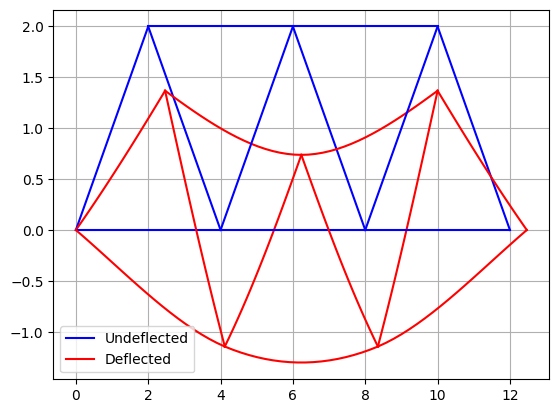

In [11]:
from FEA.FEA import *


supports = [
    PinSupport(Vec2(0, 0)),
    RollerSupport(Vec2(12, 0)),
]

d_outer = 160e-3
d_inner = 130e-3

r_outer = d_outer / 2
r_inner = d_inner / 2

E = 200e9
I = np.pi / 4 * (r_outer ** 4 - r_inner ** 4)
L1 = 4
L2 = np.sqrt(2 ** 2 + 2 ** 2)
A = np.pi * (r_outer **2 - r_inner ** 2)

elements = [
    Element([Vec2(0, 0), Vec2(2, 2)],   E, I, L2, A, 45),
    Element([Vec2(0, 0), Vec2(4, 0)],   E, I, L1, A, 0, point_load=(L1, 0, 400e3, 1, -1)),
    Element([Vec2(2, 2), Vec2(4, 0)],   E, I, L2, A, -45),
    Element([Vec2(2, 2), Vec2(6, 2)],   E, I, L1, A, 0),
    Element([Vec2(4, 0), Vec2(6, 2)],   E, I, L2, A, 45),
    Element([Vec2(4, 0), Vec2(8, 0)],   E, I, L1, A, 0, point_load=(L1, 0, 400e3, 1, -1)),
    Element([Vec2(6, 2), Vec2(8, 0)],   E, I, L2, A, -45),
    Element([Vec2(6, 2), Vec2(10, 2)],  E, I, L1, A, 0),
    Element([Vec2(8, 0), Vec2(10, 2)],  E, I, L2, A, 45),
    Element([Vec2(8, 0), Vec2(12, 0)],  E, I, L1, A, 0),
    Element([Vec2(10, 2), Vec2(12, 0)], E, I, L2, A, -45)
]

Q = np.zeros((18, 1))

structure = Structure(elements, supports, Q)

structure.solve()

# for element in structure.elements:
    # element.plot_DOF()
    # print(element.assembly_mat)

print(structure.q)

structure.plot_structure(100, 20)

In [12]:
# you should install numpy package with `pip install numpy` command
import numpy as np

def convert_np_to_word(arr, transpose=False, decimals=8):
    # 2D array is not need [1] so we should check the dimension
    if np.asarray(arr).ndim == 1:
        # 1D array can't get transpose if we not add '[]' at before and after array's variable. Reference: [1]
        arr = np.asarray([arr])
    else:
        # 2D array is fine, not like [1]
        arr = np.asarray(arr)
        
    if transpose:
        # thanks to [1] so we can also transpose 1D, not just 2D
        arr = arr.T
        
    # round the number to @param decimals
    arr = np.around(arr, decimals=decimals)
    
    row_num = arr.shape[0]
    col_num = arr.shape[1]

    if (col_num == 1):
        result = '[■('
        result += '@'.join([str(arr[row][0]) for row in range(row_num)])
        result += ')]'
    elif (row_num == 1):
        result = '[■('
        result += '&'.join([str(arr[0][col]) for col in range(col_num)])
        result += ')]'
    else:
        result = '[■('
        result += '@'.join(['&'.join([str(arr[row, col]) for col in range(col_num)]) for row in range(row_num)])
        result += ')]'
    
    print(result)

beta = "beta"
zero = "0"
L = "L"

matrix = [
            [beta , zero       , zero          , -beta, zero        , zero          ],
            [zero    , "12"      , "6*L"   , zero    , "-12"      , "6*L"   ],
            [zero    , "6*L", "4*L^2", zero    , "-6*L", "2*L^2"],
            ["-"+beta, zero       , zero          , beta , zero        , zero          ],
            ["0"    , "-12"     , "-6*L"  , zero    , "12"       , "-6*L"  ],
            ["0"    , "6*L", "2*L^2", zero    , "-6*L", "4*L^2"]
        ]


# EXAMPLE USAGE
convert_np_to_word(
    matrix,
    transpose=False,
    decimals=8          # round to 8 decimals
)

TypeError: bad operand type for unary -: 'str'